In [1]:
import os
os.getcwd()

'D:\\Customer Revenue Prediction Code'

In [2]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
# dataset can be found here: https://www.kaggle.com/henrysue/online-shoppers-intention
shop = pd.read_csv("online_shoppers_intention.csv")
shop.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
# Out target column is: Revenue - A boolean representing whether or not the user completed the purchase.

In [5]:
shop.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [6]:
shop.shape

(12330, 18)

In [7]:
shop.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

<AxesSubplot:>

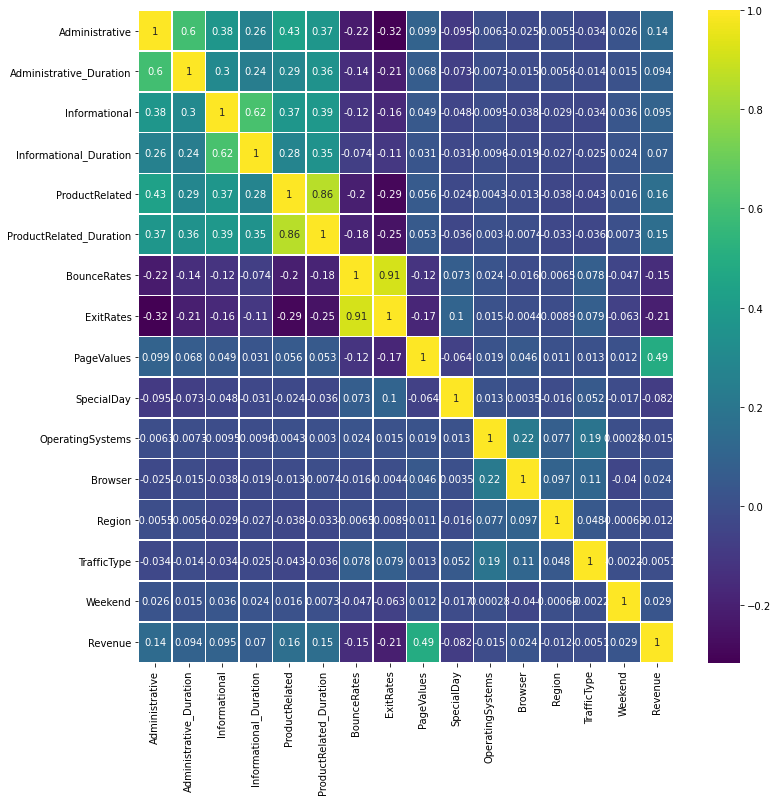

In [8]:
plt.figure(figsize=(12,12))
sns.heatmap(shop.corr(),annot=True,cmap='viridis',linewidths=.5)

In [9]:
shope = shop.drop(['Administrative', 'Informational', 'ProductRelated_Duration'], axis = 1)
shope.shape

(12330, 15)

In [10]:
# Finding about categorical data

In [11]:
shope.head()

,Administrative_Duration,Informational_Duration,ProductRelated,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,1,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,2,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,0.0,1,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,2,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,10,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [12]:
shope['ProductRelated'].value_counts() # a categorical type but the data is too spread (ranges from 1 too 399)

1      622
2      465
3      458
4      404
6      396
      ... 
377      1
385      1
292      1
409      1
339      1
Name: ProductRelated, Length: 311, dtype: int64

In [13]:
shope['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

In [14]:
shope['OperatingSystems'].value_counts()

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

In [15]:
shope['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [16]:
shope['Browser'].value_counts()

2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

In [17]:
shope['Region'].value_counts()

1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64

In [18]:
shope.head()

,Administrative_Duration,Informational_Duration,ProductRelated,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,1,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,2,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,0.0,1,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,2,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,10,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [19]:
shope.shape

(12330, 15)

In [20]:
visitor = pd.get_dummies(shope['VisitorType'])

X = pd.concat([shope, visitor], axis=1)
X.head()

,Administrative_Duration,Informational_Duration,ProductRelated,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,New_Visitor,Other,Returning_Visitor
0,0.0,0.0,1,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False,0,0,1
1,0.0,0.0,2,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,0,0,1
2,0.0,0.0,1,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False,0,0,1
3,0.0,0.0,2,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False,0,0,1
4,0.0,0.0,10,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False,0,0,1


In [21]:
shope.shape

(12330, 15)

In [22]:
# Now we have build some features and extracted some feature data, whats left is to remove redundant features
X.columns

Index(['Administrative_Duration', 'Informational_Duration', 'ProductRelated',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue', 'New_Visitor', 'Other', 'Returning_Visitor'],
      dtype='object')

In [23]:
y = X['Revenue']
X_new = X.drop(['Revenue', 'Month', 'VisitorType'], axis = 1)
X.shape

(12330, 18)

In [24]:
y[1:12330]

1        False
2        False
3        False
4        False
5        False
         ...  
12325    False
12326    False
12327    False
12328    False
12329    False
Name: Revenue, Length: 12329, dtype: bool

In [25]:
X_new['Weekend'] = np.asarray(X_new['Weekend']).astype(np.float32)

y = np.asarray(y).astype(np.float32)

<AxesSubplot:xlabel='BounceRates', ylabel='ExitRates'>

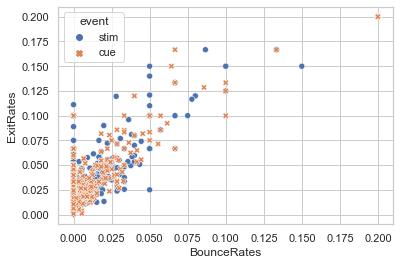

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
fmri = sns.load_dataset("fmri")
 
sns.scatterplot(x=X["BounceRates"], y=X["ExitRates"],
                    hue="event",
                    style="event",data=fmri
               )
    



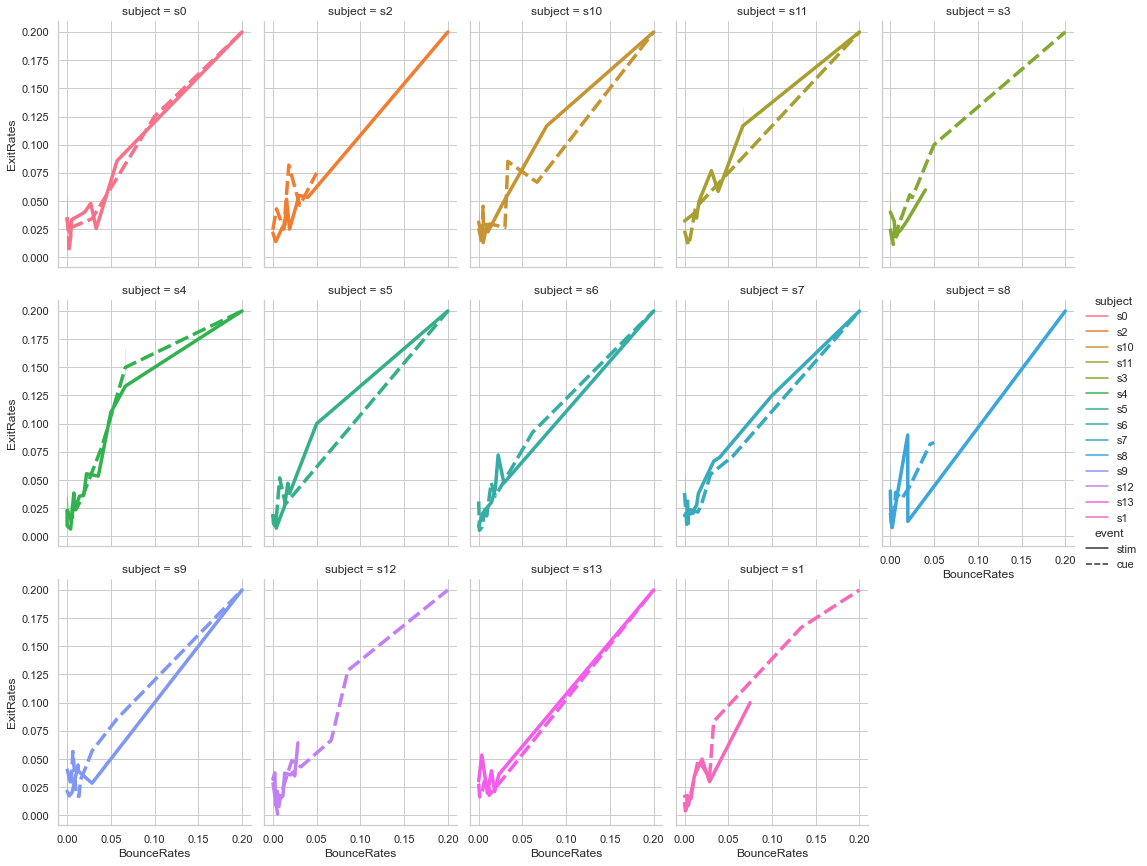

In [27]:
sns.relplot(x=X["BounceRates"], y=X["ExitRates"], hue="subject", style="event",
            col="subject", col_wrap=5,
            height=4, aspect=.75, linewidth=3.5,
            kind="line", data=fmri.query("region == 'frontal'"));

In [28]:
y.shape

(12330,)

In [29]:
# The above code converts the boolean values to float type - actaully it converts all the data into float type. This has been done so that
# the sequential model is able to build tensors out of them
y.shape


(12330,)

In [30]:
X_new.shape

(12330, 15)

In [31]:
model = Sequential()
model.add(Dense(units=18,activation="relu"))
model.add(Dense(units=32,activation="relu"))
model.add(Dense(units=16,activation="relu"))

# Last layer for multi-class classification of 3 species
model.add(Dense(units=2,activation="softmax"))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [32]:
# """
# In the above code, we have started with creating a Sequential Keras model with the first layer as dense having 4 inputs for the 4 columns 
# in our X (Sepal Length, Sepal Width, Petal Length, Petal Width).

# After this, we have added 2 hidden layers and using “relu” as the activation function for all the layers except the last one.
# The last layer contains 2 units for 2 respective classes of Revenue (False, True) with “softmax” activation 
# function as we are dealing with Multi-Class classification problem, also while compiling the model we are using “adam” optimizer along 
# with “accuracy” as metrics to maximize the same and minimizing our defined loss “categorical_crossentropy” with each epoch.
# """

In [33]:
model.fit(X_new,y,epochs=1000, validation_split=0.1)

Epoch 1/1000

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

347/347 [==============================] - 1s 2ms/step - loss: 0.5356 - accuracy: 0.8593 - val_loss: 0.5512 - val_accuracy: 0.8321
Epoch 2/1000
347/347 [==============================] - 1s 2ms/step - loss: 0.3656 - accuracy: 0.8844 - val_loss: 0.4312 - val_accuracy: 0.8216
Epoch 3/1000
347/347 [==============================] - 1s 2ms/step - loss: 0.3200 - accuracy: 0.8890 - val_loss: 0.4283 - val_accuracy: 0.8337
Epoch 4/1000
347/347 [==============================] - 1s 1ms/step - loss: 

347/347 [==============================] - 1s 2ms/step - loss: 0.2328 - accuracy: 0.9008 - val_loss: 0.3772 - val_accuracy: 0.8386
Epoch 53/1000
347/347 [==============================] - 1s 2ms/step - loss: 0.2321 - accuracy: 0.9005 - val_loss: 0.3748 - val_accuracy: 0.8410
Epoch 54/1000
347/347 [==============================] - 1s 2ms/step - loss: 0.2308 - accuracy: 0.9009 - val_loss: 0.3805 - val_accuracy: 0.8402
Epoch 55/1000
347/347 [==============================] - 1s 2ms/step - loss: 0.2317 - accuracy: 0.9015 - val_loss: 0.3660 - val_accuracy: 0.8402
Epoch 56/1000
347/347 [==============================] - 1s 1ms/step - loss: 0.2326 - accuracy: 0.9004 - val_loss: 0.3752 - val_accuracy: 0.8378
Epoch 57/1000
347/347 [==============================] - 1s 2ms/step - loss: 0.2296 - accuracy: 0.9022 - val_loss: 0.3837 - val_accuracy: 0.8354
Epoch 58/1000
347/347 [==============================] - 1s 2ms/step - loss: 0.2306 - accuracy: 0.9011 - val_loss: 0.3669 - val_accuracy: 0.8329

347/347 [==============================] - 1s 2ms/step - loss: 0.2189 - accuracy: 0.9053 - val_loss: 0.3675 - val_accuracy: 0.8443
Epoch 109/1000
347/347 [==============================] - 1s 2ms/step - loss: 0.2192 - accuracy: 0.9047 - val_loss: 0.3960 - val_accuracy: 0.8394
Epoch 110/1000
347/347 [==============================] - 1s 2ms/step - loss: 0.2199 - accuracy: 0.9049 - val_loss: 0.3968 - val_accuracy: 0.8435
Epoch 111/1000
347/347 [==============================] - 1s 2ms/step - loss: 0.2200 - accuracy: 0.9066 - val_loss: 0.3792 - val_accuracy: 0.8427
Epoch 112/1000
347/347 [==============================] - 1s 2ms/step - loss: 0.2178 - accuracy: 0.9068 - val_loss: 0.3970 - val_accuracy: 0.8410
Epoch 113/1000
347/347 [==============================] - 1s 2ms/step - loss: 0.2171 - accuracy: 0.9061 - val_loss: 0.3860 - val_accuracy: 0.8386
Epoch 114/1000
347/347 [==============================] - 1s 2ms/step - loss: 0.2182 - accuracy: 0.9061 - val_loss: 0.3778 - val_accuracy: 

Epoch 164/1000
347/347 [==============================] - 1s 3ms/step - loss: 0.2091 - accuracy: 0.9101 - val_loss: 0.4231 - val_accuracy: 0.8362
Epoch 165/1000
347/347 [==============================] - 1s 4ms/step - loss: 0.2108 - accuracy: 0.9087 - val_loss: 0.4084 - val_accuracy: 0.8362
Epoch 166/1000
347/347 [==============================] - 1s 2ms/step - loss: 0.2085 - accuracy: 0.9083 - val_loss: 0.4170 - val_accuracy: 0.8410
Epoch 167/1000
347/347 [==============================] - 1s 2ms/step - loss: 0.2081 - accuracy: 0.9098 - val_loss: 0.4255 - val_accuracy: 0.8362
Epoch 168/1000
347/347 [==============================] - 1s 2ms/step - loss: 0.2092 - accuracy: 0.9103 - val_loss: 0.4151 - val_accuracy: 0.8345
Epoch 169/1000
347/347 [==============================] - 1s 2ms/step - loss: 0.2079 - accuracy: 0.9091 - val_loss: 0.4213 - val_accuracy: 0.8386
Epoch 170/1000
347/347 [==============================] - 1s 2ms/step - loss: 0.2076 - accuracy: 0.9120 - val_loss: 0.4465 -

347/347 [==============================] - 1s 2ms/step - loss: 0.2019 - accuracy: 0.9132 - val_loss: 0.4468 - val_accuracy: 0.8418
Epoch 221/1000
347/347 [==============================] - 1s 2ms/step - loss: 0.2007 - accuracy: 0.9142 - val_loss: 0.4705 - val_accuracy: 0.8386
Epoch 222/1000
347/347 [==============================] - 1s 2ms/step - loss: 0.2002 - accuracy: 0.9123 - val_loss: 0.4388 - val_accuracy: 0.8378
Epoch 223/1000
347/347 [==============================] - 1s 2ms/step - loss: 0.2021 - accuracy: 0.9131 - val_loss: 0.4565 - val_accuracy: 0.8386
Epoch 224/1000
347/347 [==============================] - 1s 2ms/step - loss: 0.2012 - accuracy: 0.9140 - val_loss: 0.4444 - val_accuracy: 0.8321
Epoch 225/1000
347/347 [==============================] - 1s 2ms/step - loss: 0.2011 - accuracy: 0.9124 - val_loss: 0.4394 - val_accuracy: 0.8378
Epoch 226/1000
347/347 [==============================] - 1s 2ms/step - loss: 0.1992 - accuracy: 0.9138 - val_loss: 0.4592 - val_accuracy: 

347/347 [==============================] - 1s 3ms/step - loss: 0.1953 - accuracy: 0.9148 - val_loss: 0.4967 - val_accuracy: 0.8378
Epoch 277/1000
347/347 [==============================] - 1s 2ms/step - loss: 0.1949 - accuracy: 0.9158 - val_loss: 0.5184 - val_accuracy: 0.8354
Epoch 278/1000
347/347 [==============================] - 1s 2ms/step - loss: 0.1949 - accuracy: 0.9147 - val_loss: 0.5309 - val_accuracy: 0.8410
Epoch 279/1000
347/347 [==============================] - 1s 2ms/step - loss: 0.1986 - accuracy: 0.9139 - val_loss: 0.5139 - val_accuracy: 0.8378
Epoch 280/1000
347/347 [==============================] - 1s 2ms/step - loss: 0.1977 - accuracy: 0.9144 - val_loss: 0.4703 - val_accuracy: 0.8362
Epoch 281/1000
347/347 [==============================] - 1s 2ms/step - loss: 0.1960 - accuracy: 0.9150 - val_loss: 0.4809 - val_accuracy: 0.8394
Epoch 282/1000
347/347 [==============================] - 1s 2ms/step - loss: 0.1969 - accuracy: 0.9148 - val_loss: 0.5155 - val_accuracy: 

347/347 [==============================] - 1s 2ms/step - loss: 0.1919 - accuracy: 0.9155 - val_loss: 0.5229 - val_accuracy: 0.8370
Epoch 333/1000
347/347 [==============================] - 1s 2ms/step - loss: 0.1897 - accuracy: 0.9184 - val_loss: 0.5472 - val_accuracy: 0.8248
Epoch 334/1000
347/347 [==============================] - 1s 2ms/step - loss: 0.1935 - accuracy: 0.9161 - val_loss: 0.5223 - val_accuracy: 0.8329
Epoch 335/1000
347/347 [==============================] - 1s 2ms/step - loss: 0.1916 - accuracy: 0.9165 - val_loss: 0.5221 - val_accuracy: 0.8337
Epoch 336/1000
347/347 [==============================] - 1s 3ms/step - loss: 0.1910 - accuracy: 0.9179 - val_loss: 0.5237 - val_accuracy: 0.8305
Epoch 337/1000
347/347 [==============================] - 1s 2ms/step - loss: 0.1980 - accuracy: 0.9139 - val_loss: 0.5879 - val_accuracy: 0.8370
Epoch 338/1000
347/347 [==============================] - 1s 2ms/step - loss: 0.1933 - accuracy: 0.9175 - val_loss: 0.5940 - val_accuracy: 

347/347 [==============================] - 0s 1ms/step - loss: 0.1929 - accuracy: 0.9177 - val_loss: 0.5358 - val_accuracy: 0.8345
Epoch 389/1000
347/347 [==============================] - 1s 2ms/step - loss: 0.1920 - accuracy: 0.9170 - val_loss: 0.5565 - val_accuracy: 0.8329
Epoch 390/1000
347/347 [==============================] - 0s 1ms/step - loss: 0.1879 - accuracy: 0.9186 - val_loss: 0.5488 - val_accuracy: 0.8297
Epoch 391/1000
347/347 [==============================] - 0s 1ms/step - loss: 0.1911 - accuracy: 0.9168 - val_loss: 0.5272 - val_accuracy: 0.8394
Epoch 392/1000
347/347 [==============================] - 1s 2ms/step - loss: 0.1890 - accuracy: 0.9177 - val_loss: 0.5277 - val_accuracy: 0.8281
Epoch 393/1000
347/347 [==============================] - 0s 1ms/step - loss: 0.1889 - accuracy: 0.9179 - val_loss: 0.5049 - val_accuracy: 0.8337
Epoch 394/1000
347/347 [==============================] - 1s 1ms/step - loss: 0.1920 - accuracy: 0.9184 - val_loss: 0.5557 - val_accuracy: 

347/347 [==============================] - 0s 1ms/step - loss: 0.1880 - accuracy: 0.9186 - val_loss: 0.6004 - val_accuracy: 0.8354
Epoch 445/1000
347/347 [==============================] - 1s 2ms/step - loss: 0.1868 - accuracy: 0.9193 - val_loss: 0.6135 - val_accuracy: 0.8321
Epoch 446/1000
347/347 [==============================] - 1s 1ms/step - loss: 0.1877 - accuracy: 0.9193 - val_loss: 0.5707 - val_accuracy: 0.8329
Epoch 447/1000
347/347 [==============================] - 0s 1ms/step - loss: 0.1857 - accuracy: 0.9201 - val_loss: 0.6187 - val_accuracy: 0.8443
Epoch 448/1000
347/347 [==============================] - 1s 2ms/step - loss: 0.1846 - accuracy: 0.9188 - val_loss: 0.5559 - val_accuracy: 0.8329
Epoch 449/1000
347/347 [==============================] - 0s 1ms/step - loss: 0.1857 - accuracy: 0.9191 - val_loss: 0.5787 - val_accuracy: 0.8378
Epoch 450/1000
347/347 [==============================] - 1s 2ms/step - loss: 0.1857 - accuracy: 0.9184 - val_loss: 0.5497 - val_accuracy: 

347/347 [==============================] - 1s 2ms/step - loss: 0.1843 - accuracy: 0.9193 - val_loss: 0.6062 - val_accuracy: 0.8345
Epoch 501/1000
347/347 [==============================] - 1s 2ms/step - loss: 0.1819 - accuracy: 0.9203 - val_loss: 0.5969 - val_accuracy: 0.8427
Epoch 502/1000
347/347 [==============================] - 1s 2ms/step - loss: 0.1823 - accuracy: 0.9208 - val_loss: 0.5782 - val_accuracy: 0.8329
Epoch 503/1000
347/347 [==============================] - 1s 2ms/step - loss: 0.1874 - accuracy: 0.9169 - val_loss: 0.6124 - val_accuracy: 0.8305
Epoch 504/1000
347/347 [==============================] - 1s 2ms/step - loss: 0.1846 - accuracy: 0.9171 - val_loss: 0.6153 - val_accuracy: 0.8305
Epoch 505/1000
347/347 [==============================] - 1s 2ms/step - loss: 0.1863 - accuracy: 0.9196 - val_loss: 0.6517 - val_accuracy: 0.8337
Epoch 506/1000
347/347 [==============================] - 0s 1ms/step - loss: 0.1863 - accuracy: 0.9178 - val_loss: 0.5735 - val_accuracy: 

Epoch 556/1000
347/347 [==============================] - 1s 1ms/step - loss: 0.1850 - accuracy: 0.9191 - val_loss: 0.5981 - val_accuracy: 0.8297
Epoch 557/1000
347/347 [==============================] - 0s 1ms/step - loss: 0.1829 - accuracy: 0.9156 - val_loss: 0.6239 - val_accuracy: 0.8362
Epoch 558/1000
347/347 [==============================] - 1s 2ms/step - loss: 0.1808 - accuracy: 0.9202 - val_loss: 0.6377 - val_accuracy: 0.8313
Epoch 559/1000
347/347 [==============================] - 0s 1ms/step - loss: 0.1807 - accuracy: 0.9213 - val_loss: 0.6233 - val_accuracy: 0.8321
Epoch 560/1000
347/347 [==============================] - 1s 2ms/step - loss: 0.1781 - accuracy: 0.9202 - val_loss: 0.6382 - val_accuracy: 0.8232
Epoch 561/1000
347/347 [==============================] - 0s 1ms/step - loss: 0.1821 - accuracy: 0.9195 - val_loss: 0.6237 - val_accuracy: 0.8273
Epoch 562/1000
347/347 [==============================] - 1s 2ms/step - loss: 0.1935 - accuracy: 0.9183 - val_loss: 0.5873 -

347/347 [==============================] - 1s 2ms/step - loss: 0.1786 - accuracy: 0.9193 - val_loss: 0.6754 - val_accuracy: 0.8329
Epoch 613/1000
347/347 [==============================] - 0s 1ms/step - loss: 0.1784 - accuracy: 0.9215 - val_loss: 0.6185 - val_accuracy: 0.8337
Epoch 614/1000
347/347 [==============================] - 1s 2ms/step - loss: 0.1822 - accuracy: 0.9193 - val_loss: 0.6304 - val_accuracy: 0.8305
Epoch 615/1000
347/347 [==============================] - 0s 1ms/step - loss: 0.1823 - accuracy: 0.9193 - val_loss: 0.6411 - val_accuracy: 0.8427
Epoch 616/1000
347/347 [==============================] - 0s 1ms/step - loss: 0.1816 - accuracy: 0.9198 - val_loss: 0.6524 - val_accuracy: 0.8386
Epoch 617/1000
347/347 [==============================] - 1s 2ms/step - loss: 0.1787 - accuracy: 0.9202 - val_loss: 0.6034 - val_accuracy: 0.8305
Epoch 618/1000
347/347 [==============================] - 1s 2ms/step - loss: 0.1807 - accuracy: 0.9208 - val_loss: 0.6424 - val_accuracy: 

347/347 [==============================] - 1s 2ms/step - loss: 0.1804 - accuracy: 0.9204 - val_loss: 0.6319 - val_accuracy: 0.8329
Epoch 669/1000
347/347 [==============================] - 1s 3ms/step - loss: 0.1816 - accuracy: 0.9197 - val_loss: 0.6475 - val_accuracy: 0.8256
Epoch 670/1000
347/347 [==============================] - 1s 2ms/step - loss: 0.1772 - accuracy: 0.9221 - val_loss: 0.6441 - val_accuracy: 0.8297
Epoch 671/1000
347/347 [==============================] - 1s 2ms/step - loss: 0.1747 - accuracy: 0.9235 - val_loss: 0.6467 - val_accuracy: 0.8264
Epoch 672/1000
347/347 [==============================] - 1s 2ms/step - loss: 0.1754 - accuracy: 0.9213 - val_loss: 0.6865 - val_accuracy: 0.8345
Epoch 673/1000
347/347 [==============================] - 1s 4ms/step - loss: 0.1788 - accuracy: 0.9221 - val_loss: 0.6964 - val_accuracy: 0.8305
Epoch 674/1000
347/347 [==============================] - 1s 2ms/step - loss: 0.1769 - accuracy: 0.9215 - val_loss: 0.6871 - val_accuracy: 

Epoch 724/1000
347/347 [==============================] - 1s 2ms/step - loss: 0.1729 - accuracy: 0.9229 - val_loss: 0.7242 - val_accuracy: 0.8329
Epoch 725/1000
347/347 [==============================] - 1s 2ms/step - loss: 0.1750 - accuracy: 0.9239 - val_loss: 0.7220 - val_accuracy: 0.8281
Epoch 726/1000
347/347 [==============================] - 1s 2ms/step - loss: 0.1770 - accuracy: 0.9211 - val_loss: 0.7497 - val_accuracy: 0.8345
Epoch 727/1000
347/347 [==============================] - 1s 2ms/step - loss: 0.1783 - accuracy: 0.9208 - val_loss: 0.7237 - val_accuracy: 0.8289
Epoch 728/1000
347/347 [==============================] - 1s 2ms/step - loss: 0.1769 - accuracy: 0.9238 - val_loss: 0.7355 - val_accuracy: 0.8321
Epoch 729/1000
347/347 [==============================] - 1s 2ms/step - loss: 0.1738 - accuracy: 0.9213 - val_loss: 0.7149 - val_accuracy: 0.8281
Epoch 730/1000
347/347 [==============================] - 1s 2ms/step - loss: 0.1748 - accuracy: 0.9222 - val_loss: 0.7336 -

347/347 [==============================] - 0s 1ms/step - loss: 0.1790 - accuracy: 0.9230 - val_loss: 0.6740 - val_accuracy: 0.8264
Epoch 781/1000
347/347 [==============================] - 1s 2ms/step - loss: 0.1759 - accuracy: 0.9216 - val_loss: 0.7456 - val_accuracy: 0.8337
Epoch 782/1000
347/347 [==============================] - 0s 1ms/step - loss: 0.1759 - accuracy: 0.9211 - val_loss: 0.7261 - val_accuracy: 0.8321
Epoch 783/1000
347/347 [==============================] - 1s 2ms/step - loss: 0.1825 - accuracy: 0.9192 - val_loss: 0.6288 - val_accuracy: 0.8273
Epoch 784/1000
347/347 [==============================] - 1s 2ms/step - loss: 0.1786 - accuracy: 0.9205 - val_loss: 0.7115 - val_accuracy: 0.8354
Epoch 785/1000
347/347 [==============================] - 1s 2ms/step - loss: 0.1768 - accuracy: 0.9216 - val_loss: 0.7146 - val_accuracy: 0.8232
Epoch 786/1000
347/347 [==============================] - 1s 2ms/step - loss: 0.1726 - accuracy: 0.9238 - val_loss: 0.7207 - val_accuracy: 

347/347 [==============================] - 0s 1ms/step - loss: 0.1713 - accuracy: 0.9240 - val_loss: 0.7278 - val_accuracy: 0.8305
Epoch 837/1000
347/347 [==============================] - 0s 1ms/step - loss: 0.1703 - accuracy: 0.9240 - val_loss: 0.7786 - val_accuracy: 0.8337
Epoch 838/1000
347/347 [==============================] - 1s 2ms/step - loss: 0.1723 - accuracy: 0.9250 - val_loss: 0.7553 - val_accuracy: 0.8281
Epoch 839/1000
347/347 [==============================] - 1s 1ms/step - loss: 0.1846 - accuracy: 0.9230 - val_loss: 0.7243 - val_accuracy: 0.8362
Epoch 840/1000
347/347 [==============================] - 1s 2ms/step - loss: 0.1839 - accuracy: 0.9230 - val_loss: 0.7427 - val_accuracy: 0.8329
Epoch 841/1000
347/347 [==============================] - 0s 1ms/step - loss: 0.1750 - accuracy: 0.9216 - val_loss: 0.7424 - val_accuracy: 0.8313
Epoch 842/1000
347/347 [==============================] - 0s 1ms/step - loss: 0.1716 - accuracy: 0.9231 - val_loss: 0.7246 - val_accuracy: 

347/347 [==============================] - 1s 1ms/step - loss: 0.1761 - accuracy: 0.9224 - val_loss: 0.7502 - val_accuracy: 0.8289
Epoch 893/1000
347/347 [==============================] - 1s 2ms/step - loss: 0.1790 - accuracy: 0.9223 - val_loss: 0.7690 - val_accuracy: 0.8345
Epoch 894/1000
347/347 [==============================] - 1s 2ms/step - loss: 0.1732 - accuracy: 0.9230 - val_loss: 0.7420 - val_accuracy: 0.8321
Epoch 895/1000
347/347 [==============================] - 1s 2ms/step - loss: 0.1791 - accuracy: 0.9207 - val_loss: 0.7217 - val_accuracy: 0.8362
Epoch 896/1000
347/347 [==============================] - 1s 2ms/step - loss: 0.1708 - accuracy: 0.9240 - val_loss: 0.8239 - val_accuracy: 0.8386
Epoch 897/1000
347/347 [==============================] - 1s 2ms/step - loss: 0.1708 - accuracy: 0.9226 - val_loss: 0.7516 - val_accuracy: 0.8305
Epoch 898/1000
347/347 [==============================] - 1s 2ms/step - loss: 0.1793 - accuracy: 0.9214 - val_loss: 0.7443 - val_accuracy: 

347/347 [==============================] - 0s 1ms/step - loss: 0.1683 - accuracy: 0.9239 - val_loss: 0.8686 - val_accuracy: 0.8321
Epoch 949/1000
347/347 [==============================] - 0s 1ms/step - loss: 0.1693 - accuracy: 0.9243 - val_loss: 0.8235 - val_accuracy: 0.8264
Epoch 950/1000
347/347 [==============================] - 1s 2ms/step - loss: 0.1677 - accuracy: 0.9257 - val_loss: 0.7925 - val_accuracy: 0.8313
Epoch 951/1000
347/347 [==============================] - 0s 1ms/step - loss: 0.1693 - accuracy: 0.9230 - val_loss: 0.8086 - val_accuracy: 0.8337
Epoch 952/1000
347/347 [==============================] - 0s 1ms/step - loss: 0.1693 - accuracy: 0.9249 - val_loss: 0.7354 - val_accuracy: 0.8289
Epoch 953/1000
347/347 [==============================] - 1s 1ms/step - loss: 0.1696 - accuracy: 0.9246 - val_loss: 0.7465 - val_accuracy: 0.8289
Epoch 954/1000
347/347 [==============================] - 0s 1ms/step - loss: 0.1706 - accuracy: 0.9249 - val_loss: 0.8067 - val_accuracy: 

In [34]:
# Saving the model so we can use this in out web app.

model.save("final_shopper_model.h5")